In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
file = 'indicators/NSEI.csv'
title = "NIFTY 50"

In [4]:
df = pd.read_csv(file,index_col='Date',parse_dates=True)
df

,sma_10,wma_5,momentum_10,stck,stcd,rsi_14,ema_20,ema_50,macd,exp,cci_14,cci_21,cci_50,trend
Date,,,,,,,,,,,,,,
2010-06-11,5054.170020,5061.350033,33.050293,95.087482,78.884664,53.443399,5053.297693,5117.676669,-16.644138,-41.093677,103.717296,107.493416,-20.318103,1
2010-06-14,5065.310059,5112.626758,227.500000,100.000000,92.593176,57.836145,5067.050312,5120.814846,-3.516083,-36.083331,159.243940,163.962840,13.779605,1
2010-06-15,5090.525049,5161.206771,202.500000,100.000000,98.362494,59.142283,5081.840768,5124.796621,8.775874,-30.102104,175.704540,170.115580,35.479021,1
2010-06-16,5111.875049,5197.770117,122.850098,100.000000,100.000000,59.741615,5096.270228,5129.053620,19.183807,-23.530649,163.884449,167.388582,53.047689,1
2010-06-17,5128.310059,5232.630111,139.350098,100.000000,100.000000,62.005991,5113.277835,5134.771129,30.430093,-16.335884,143.286603,160.035810,67.854637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,14871.840039,14739.223372,-283.650391,37.353746,30.127302,49.291263,14860.747498,14626.442215,-4.875541,70.515964,-53.684525,-38.239461,6.963110,1
2021-03-24,14816.940039,14684.070182,-625.399414,0.000000,21.105110,42.848913,14831.095392,14623.420967,-27.671392,57.424317,-111.351773,-110.649706,-37.485726,-1
2021-03-25,14731.950098,14565.543620,-706.049804,0.000000,12.451249,38.289239,14782.886345,14611.714278,-63.124877,41.351091,-161.479707,-177.035298,-88.105775,-1


In [5]:
df.drop(columns='trend').describe()

,sma_10,wma_5,momentum_10,stck,stcd,rsi_14,ema_20,ema_50,macd,exp,cci_14,cci_21,cci_50
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
mean,8321.948450,8333.409202,32.657335,59.415354,59.425484,54.154687,8303.347910,8250.264506,25.765568,25.619369,19.350198,23.230316,34.897643
std,2485.256663,2494.077298,296.673529,37.561276,34.944314,12.488198,2465.464784,2413.729929,117.551862,106.515835,106.068600,108.655335,112.935668
min,4667.675000,4625.610124,-3005.549805,0.000000,0.000000,12.941799,4753.103289,4855.949583,-1005.837460,-772.093159,-314.380437,-377.993237,-403.735743
25%,5897.954980,5900.506575,-106.150390,23.057501,26.102853,45.467887,5874.685784,5851.103895,-28.021717,-25.611419,-69.980268,-63.178499,-44.224531
50%,8199.395117,8205.479948,46.550293,69.235359,68.922283,55.026519,8206.877023,8242.003133,35.644696,35.394475,39.428904,44.844699,60.575528
75%,10475.695117,10501.906641,187.450195,97.589681,92.857498,63.412394,10492.635738,10490.967441,86.598831,78.184574,102.976288,106.321424,119.651333
max,15160.595020,15251.270052,1538.700196,100.000000,100.000000,82.169304,14957.464768,14626.442215,357.070016,324.517714,360.650710,352.533134,344.544991


<AxesSubplot:>

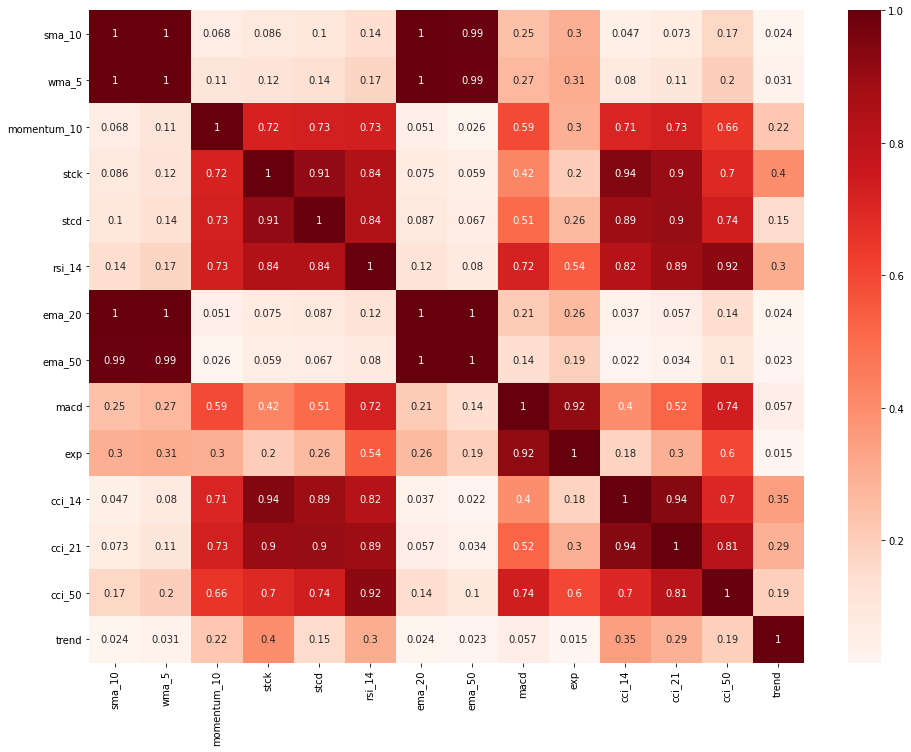

In [6]:
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='Reds',ax=ax)

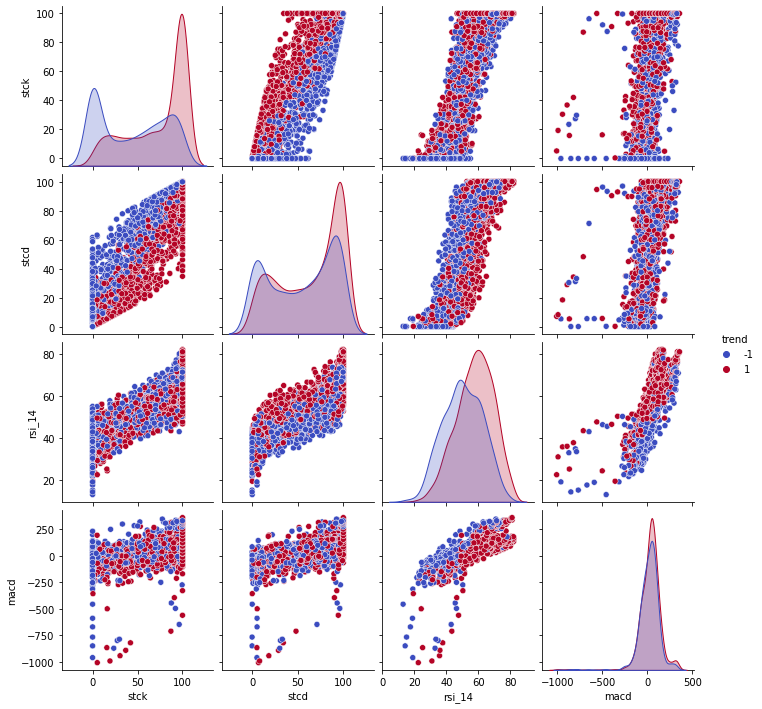

In [7]:
sns.pairplot(data=df[['stck','stcd','rsi_14','macd','trend']],hue='trend',palette='coolwarm')

In [8]:
results_df = df.copy()
results_df.drop(columns=['sma_10','wma_5','momentum_10','stck','stcd','rsi_14','ema_20','ema_50','macd','exp','cci_14','cci_21','cci_50'],inplace=True)
results_df['trend_sum'] = results_df['trend'].cumsum()

In [9]:
x = df.drop(columns='trend')
y = df['trend']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=73)

### Naive-Bayes classiﬁer

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [12]:
train_score = model.score(x_train,y_train)
train_score

0.6224604966139955

In [13]:
test_set_prediction = model.predict(x_test)
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['down','up'],columns=['predicted down','predicted up'])
matrix_df

,predicted down,predicted up
down,206,198
up,140,329


<AxesSubplot:>

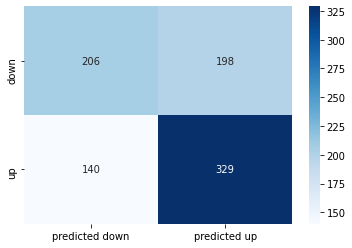

In [14]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [15]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

          -1       0.60      0.51      0.55       404
           1       0.62      0.70      0.66       469

    accuracy                           0.61       873
   macro avg       0.61      0.61      0.60       873
weighted avg       0.61      0.61      0.61       873



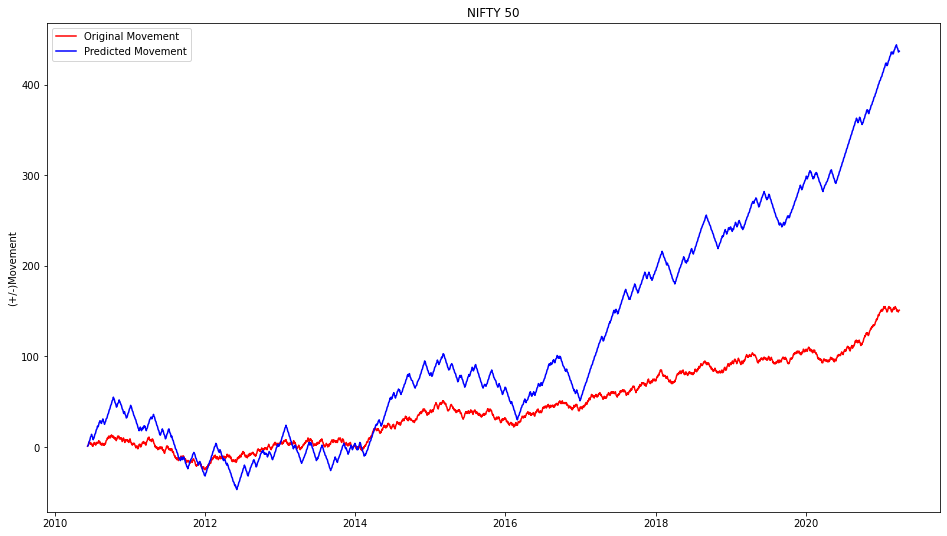

In [16]:
results_df['trend_prediction'] = model.predict(df.drop(columns='trend'))
results_df['trend_prediction_sum'] = results_df['trend_prediction'].cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(results_df['trend_sum'],color='red',label='Original Movement')
ax.plot(results_df['trend_prediction_sum'],color='blue',label='Predicted Movement')
plt.setp(ax,ylabel="(+/-)Movement",title=title)
plt.legend()

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [18]:
train_score = model.score(x_train,y_train)
train_score

0.863431151241535

In [19]:
test_set_prediction = model.predict(x_test)
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['down','up'],columns=['predicted down','predicted up'])
matrix_df

,predicted down,predicted up
down,317,87
up,52,417


<AxesSubplot:>

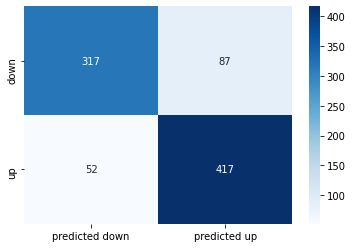

In [20]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [21]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

          -1       0.86      0.78      0.82       404
           1       0.83      0.89      0.86       469

    accuracy                           0.84       873
   macro avg       0.84      0.84      0.84       873
weighted avg       0.84      0.84      0.84       873



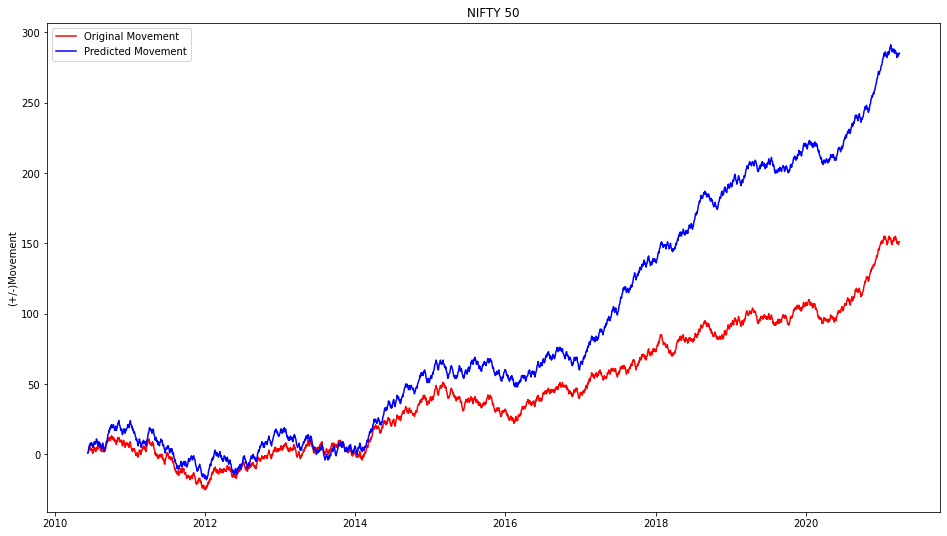

In [22]:
results_df['trend_prediction'] = model.predict(df.drop(columns='trend'))
results_df['trend_prediction_sum'] = results_df['trend_prediction'].cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(results_df['trend_sum'],color='red',label='Original Movement')
ax.plot(results_df['trend_prediction_sum'],color='blue',label='Predicted Movement')
plt.setp(ax,ylabel="(+/-)Movement",title=title)
plt.legend()

### Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,max_depth=12,criterion="entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=500)

In [24]:
train_score = model.score(x_train,y_train)
train_score

0.9971783295711061

In [25]:
test_set_prediction = model.predict(x_test)
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['down','up'],columns=['predicted down','predicted up'])
matrix_df

,predicted down,predicted up
down,358,46
up,67,402


<AxesSubplot:>

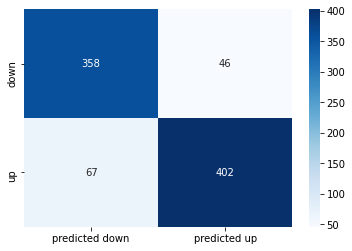

In [26]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [27]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

          -1       0.84      0.89      0.86       404
           1       0.90      0.86      0.88       469

    accuracy                           0.87       873
   macro avg       0.87      0.87      0.87       873
weighted avg       0.87      0.87      0.87       873



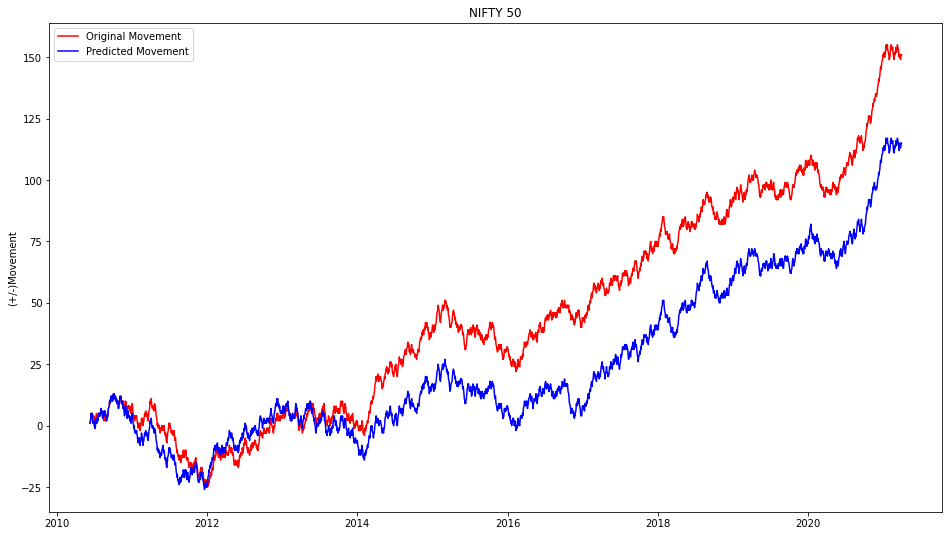

In [28]:
results_df['trend_prediction'] = model.predict(df.drop(columns='trend'))
results_df['trend_prediction_sum'] = results_df['trend_prediction'].cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(results_df['trend_sum'],color='red',label='Original Movement')
ax.plot(results_df['trend_prediction_sum'],color='blue',label='Predicted Movement')
plt.setp(ax,ylabel="(+/-)Movement",title=title)
plt.legend()

### SVM model

In [29]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
train_score = model.score(x_train,y_train)
train_score

0.8487584650112867

In [31]:
test_set_prediction = model.predict(x_test)
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['down','up'],columns=['predicted down','predicted up'])
matrix_df

,predicted down,predicted up
down,321,83
up,54,415


<AxesSubplot:>

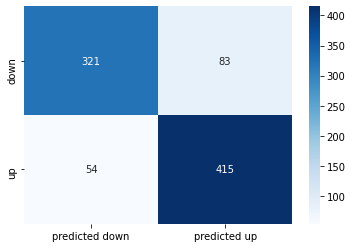

In [32]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [33]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

          -1       0.86      0.79      0.82       404
           1       0.83      0.88      0.86       469

    accuracy                           0.84       873
   macro avg       0.84      0.84      0.84       873
weighted avg       0.84      0.84      0.84       873



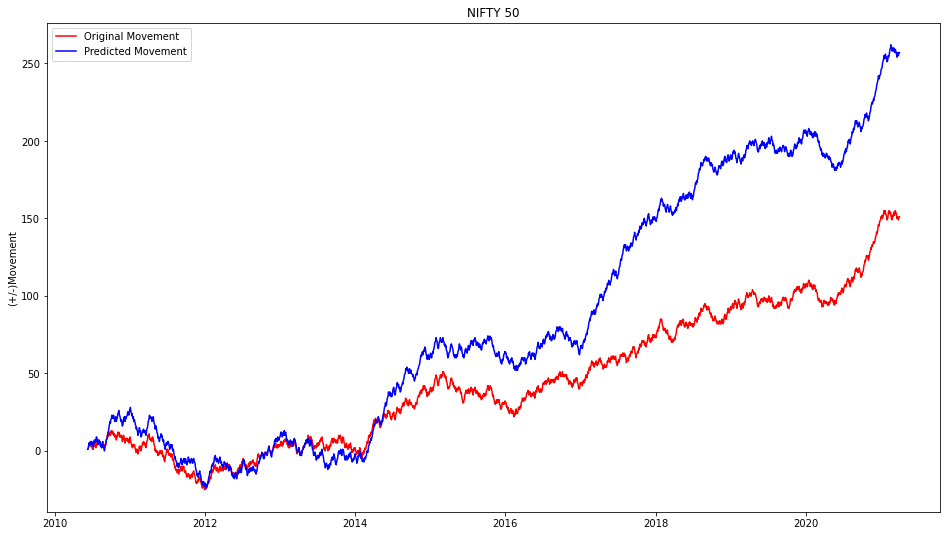

In [34]:
results_df['trend_prediction'] = model.predict(df.drop(columns='trend'))
results_df['trend_prediction_sum'] = results_df['trend_prediction'].cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(results_df['trend_sum'],color='red',label='Original Movement')
ax.plot(results_df['trend_prediction_sum'],color='blue',label='Predicted Movement')
plt.setp(ax,ylabel="(+/-)Movement",title=title)
plt.legend()

### ANN

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
df['trend'] = df.apply(lambda x: 1 if x['trend']==1 else 0,axis=1)
x = df.drop(columns='trend')
y = df['trend']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=73)

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [38]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(13,)))
model.add(layers.Dense(units=512, activation=tf.nn.relu))
model.add(layers.Dense(units=256, activation=tf.nn.relu))
model.add(layers.Dense(units=2, activation=tf.nn.softmax))

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=100)
model.fit(x_train,y_train,epochs=10,batch_size=200)
model.fit(x_train,y_train,epochs=10,batch_size=100)
model.fit(x_train,y_train,epochs=10,batch_size=200)

Epoch 1/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6670
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7568
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8115
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8442
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8194
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8420
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8273
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8386
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.8533
Epoch 10/10
18/18 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8510
Epoch 1/10
9/9 [===

In [40]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8419


[0.36224469542503357, 0.8419243693351746]

In [41]:
outputs = []
for output in model.predict(x_test):
    outputs.append(output.argmax())

In [42]:
test_set_prediction = np.array(outputs)
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['down','up'],columns=['predicted down','predicted up'])
matrix_df

,predicted down,predicted up
down,324,80
up,58,411


<AxesSubplot:>

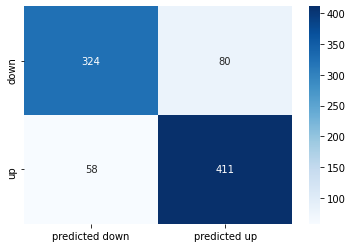

In [43]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [44]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       404
           1       0.84      0.88      0.86       469

    accuracy                           0.84       873
   macro avg       0.84      0.84      0.84       873
weighted avg       0.84      0.84      0.84       873



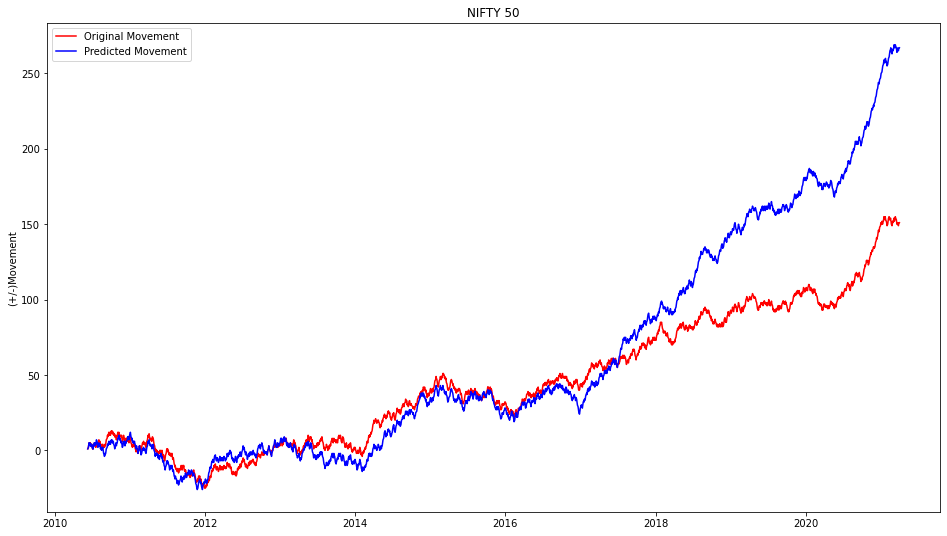

In [45]:
outputs = []
for output in model.predict(sc.fit_transform(df.drop(columns='trend'))):
    outputs.append(output.argmax())
results_df['trend_prediction']=np.array(outputs)
results_df['trend_prediction'] = results_df['trend_prediction'].apply(lambda x: 1 if x==1 else -1)
results_df['trend_prediction_sum'] = results_df['trend_prediction'].cumsum()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(results_df['trend_sum'],color='red',label='Original Movement')
ax.plot(results_df['trend_prediction_sum'],color='blue',label='Predicted Movement')
plt.setp(ax,ylabel="(+/-)Movement",title=title)
plt.legend()